<a href="https://colab.research.google.com/github/kavyaagrawal305/Bike_sharing_assignment/blob/main/Bike_sharing_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing essential Libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

**Step 1: Reading the Data**


In [ ]:
#Read the csv file using pandas
bikeSharing_df = pd.read_csv('/content/sample_data/day.csv')

In [ ]:
# Print the first few rows of the DataFrame
print("First five rows of the DataFrame:")
bikeSharing_df.head()

First five rows of the DataFrame:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
# Print the shape of the DataFrame
print("\nShape of the DataFrame:", bikeSharing_df.shape)



Shape of the DataFrame: (730, 16)


In [ ]:
# Print information about the DataFrame
print("\nInformation about the DataFrame:")
print(bikeSharing_df.info())



Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [ ]:
 #Checking for Missing Values:**

# Check for missing values in each column
missing_values = bikeSharing_df.isnull().sum()

# Print the number of missing values in each column
print("\nMissing values in each column:")
print(missing_values)



Missing values in each column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
# Droping instant column as it is index column which has nothing to do with target
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)


In [ ]:
# **Descriptive Statistics:**
bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## **Data Preparation**
- `instant` is just a row instance identifier.
- `dteday` is removed as we have some of date features like `mnth` and `year` and `weekday` already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.


In [ ]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
bikeSharing_df['days_old'] = (pd.to_datetime(bikeSharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [ ]:
# Droping instant column as it is index column which has nothing to do with target
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bikeSharing_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bikeSharing_df.drop(['casual'], axis = 1, inplace = True)
bikeSharing_df.drop(['registered'], axis = 1, inplace = True)


In [ ]:
bikeSharing_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [ ]:
bikeSharing_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [ ]:
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


**Handle Outliers**

In [ ]:
### Handle Outliers
bikeSharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

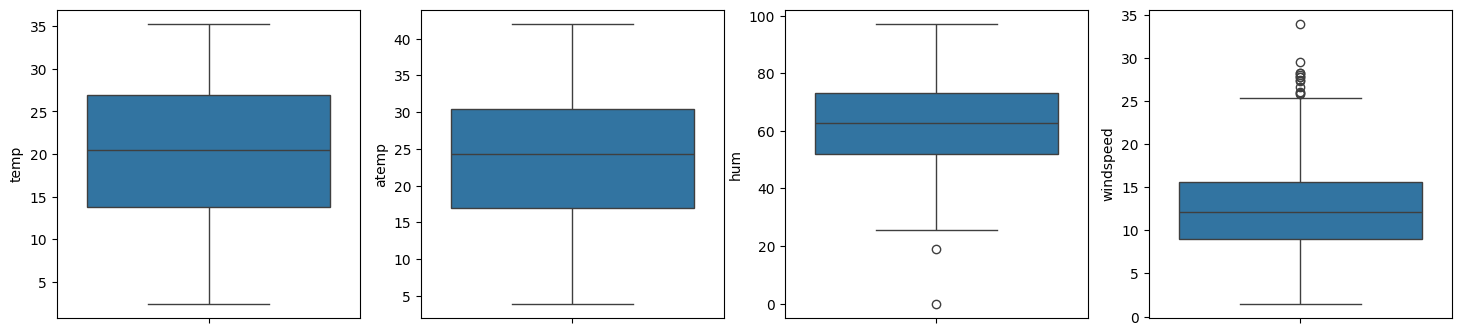

In [ ]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1

From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

Convert season and weathersit to categorical types

In [ ]:
bikeSharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeSharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikeSharing_df.mnth = bikeSharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeSharing_df.weekday = bikeSharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


Draw Pair Plots to figure Linear Relationship between the Variables

<Figure size 1500x3000 with 0 Axes>

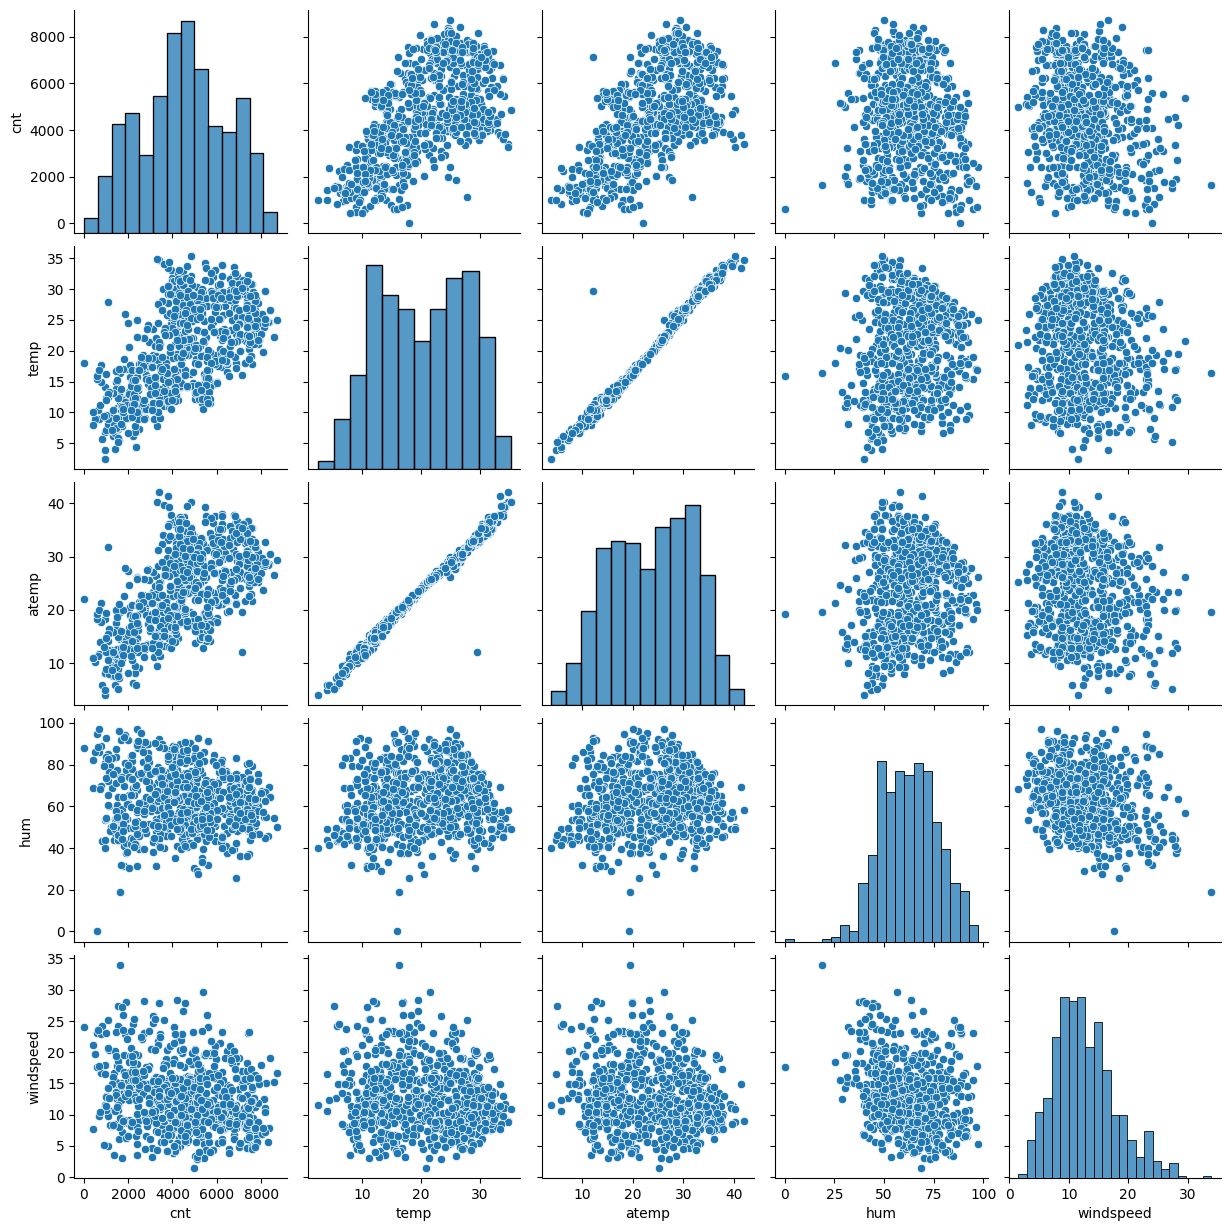

In [ ]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### _`Inference`_:
- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other
#### As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp.

<Figure size 2000x1500 with 0 Axes>

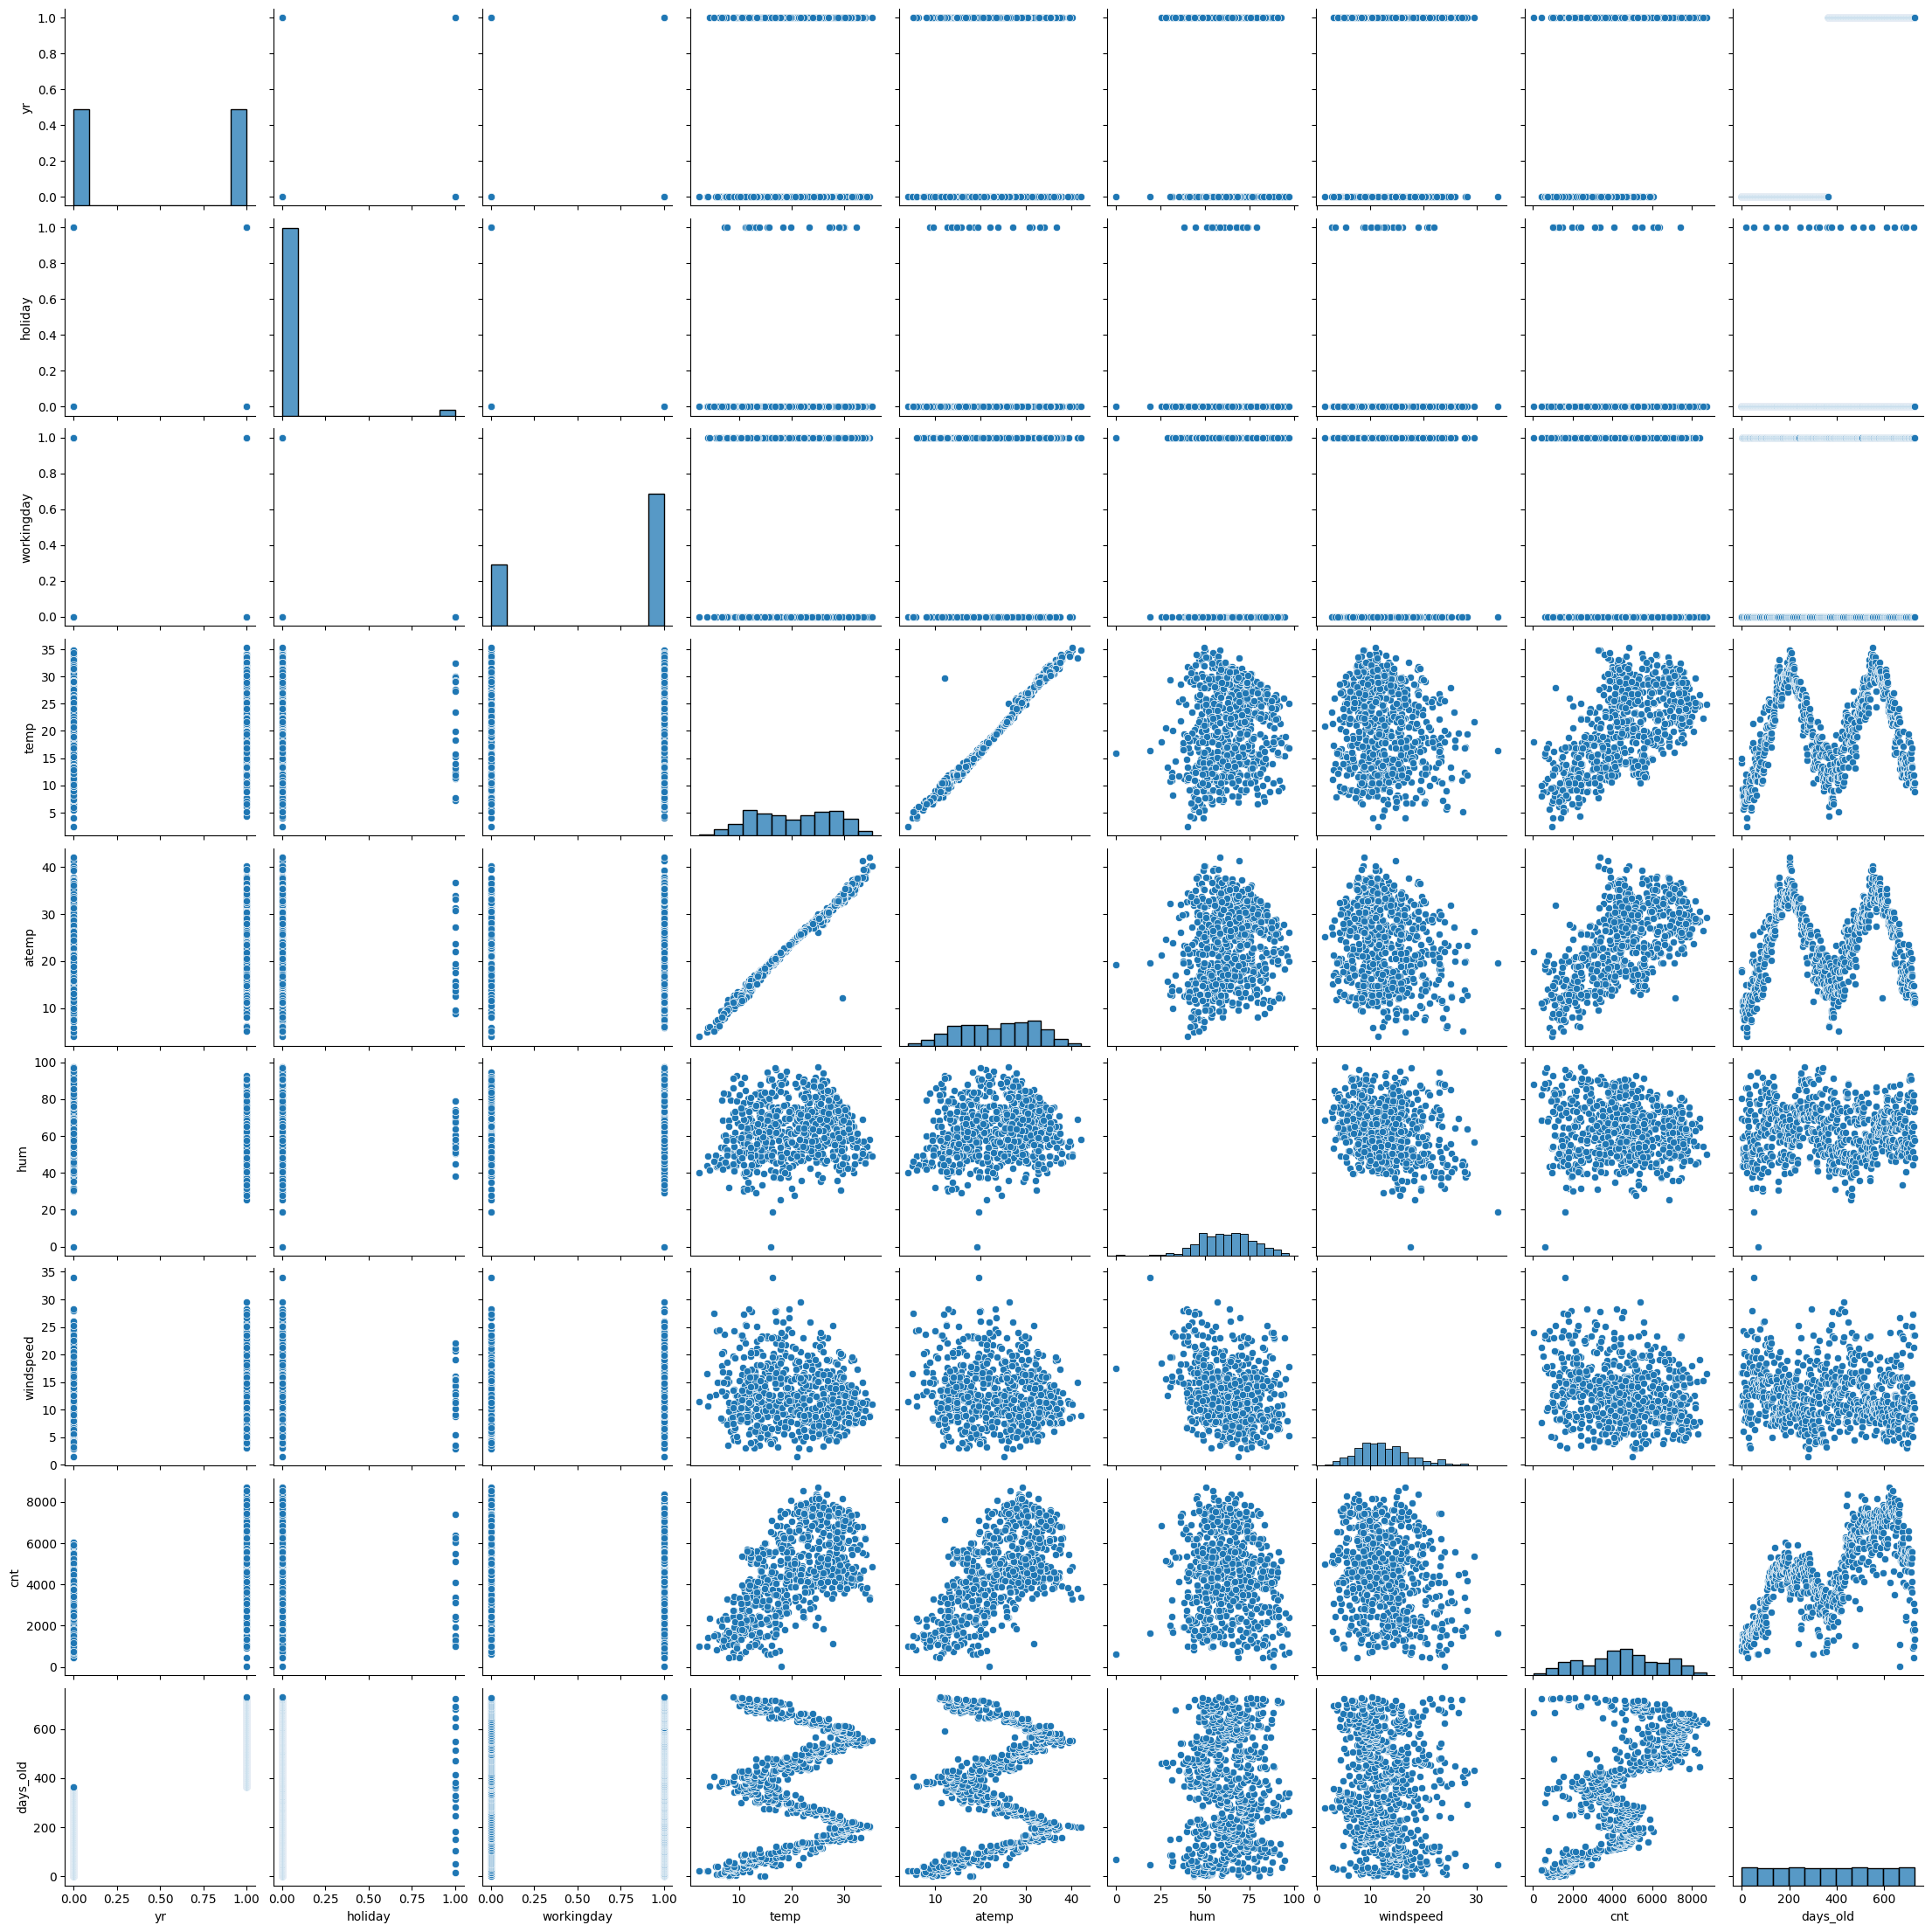

In [ ]:
plt.figure(figsize=(20,15))
sns.pairplot(bikeSharing_df)
plt.show()

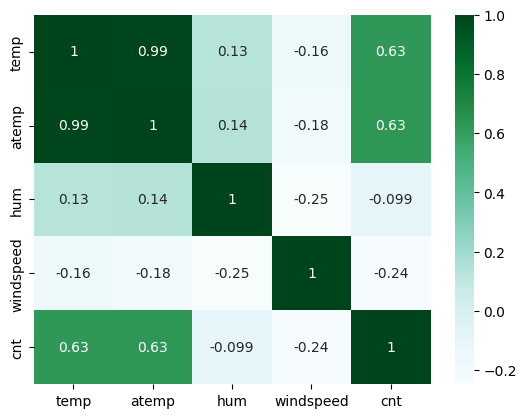

In [ ]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeSharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

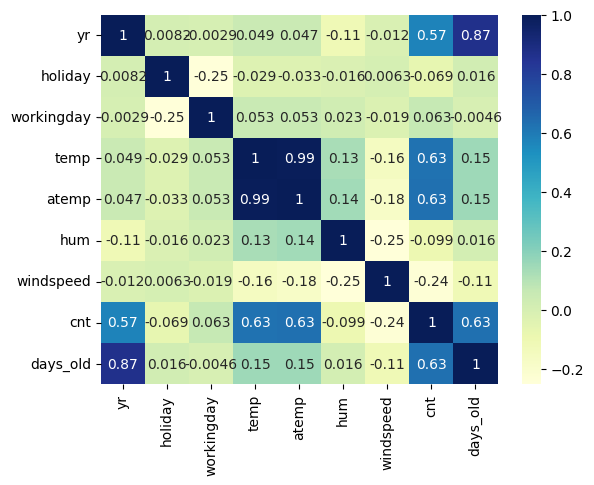

In [ ]:
#Correlations for numeric variables
cor=bikeSharing_df.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()


From the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
We also see Target variable has a linear relationship with some of the indeptendent variables. Good sign for building a linear regression Model.

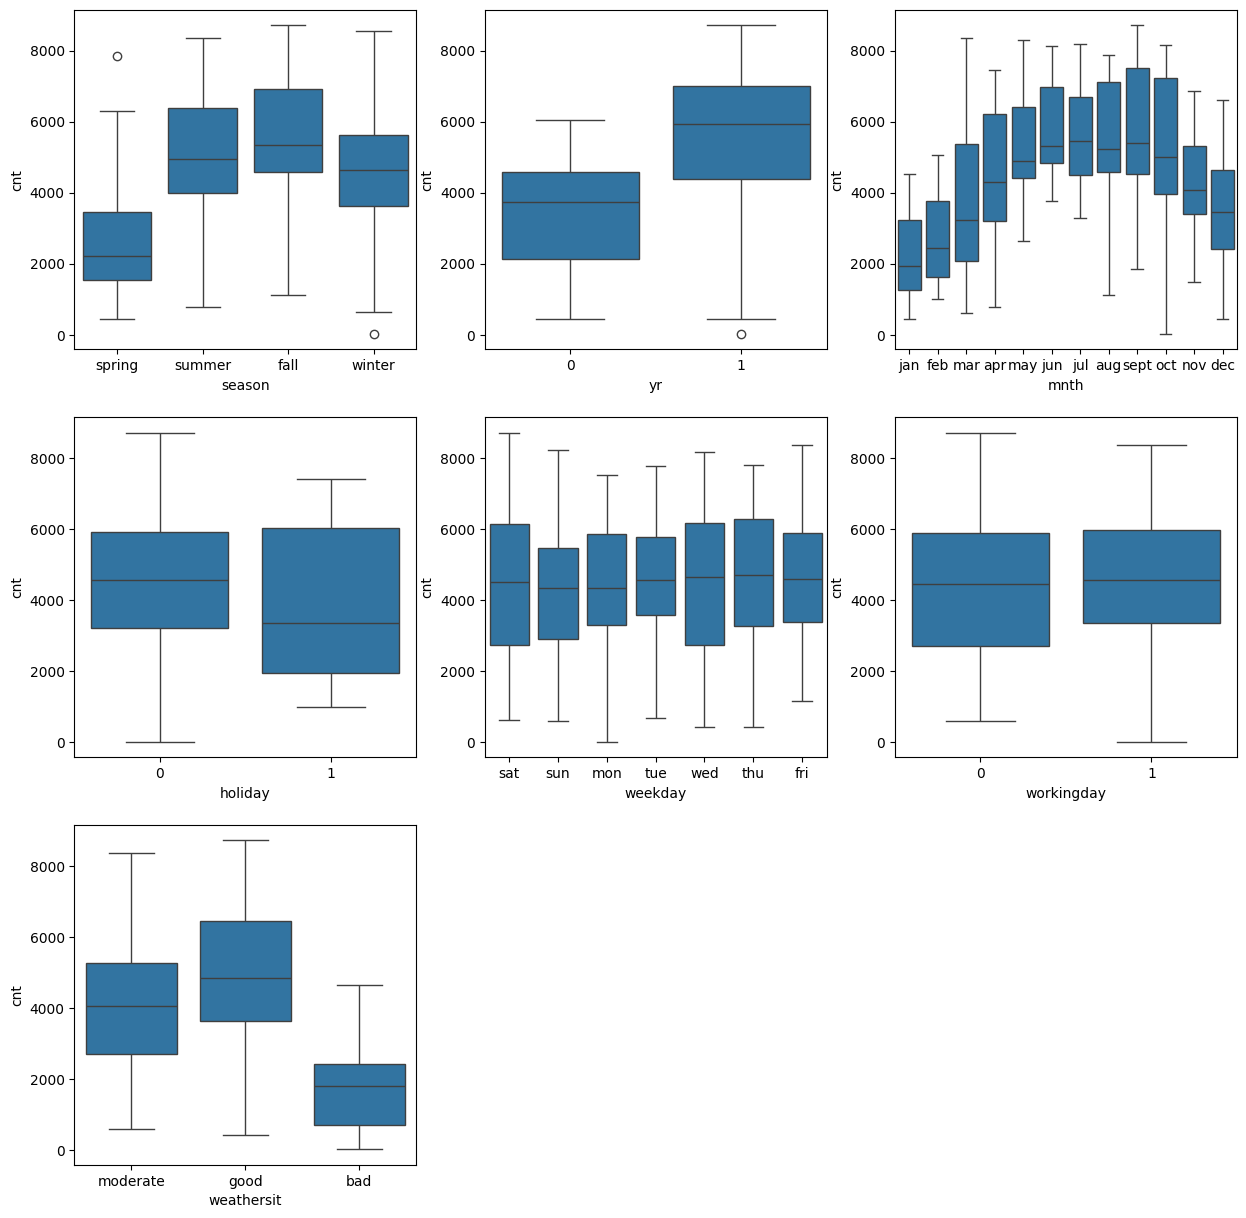

In [ ]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='cnt')
plt.show()

#### _`Inference`_:
    Here many insights can be drawn from the plots

    1. Season: 3:fall has highest demand for rental bikes
    2. we can see that demand for next year has grown
    3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreases
    4. When there is a holiday, demand has decreased.
    5. Weekday is not giving clear picture abount demand.
    6. The clear weathersit has highest demand
    7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.

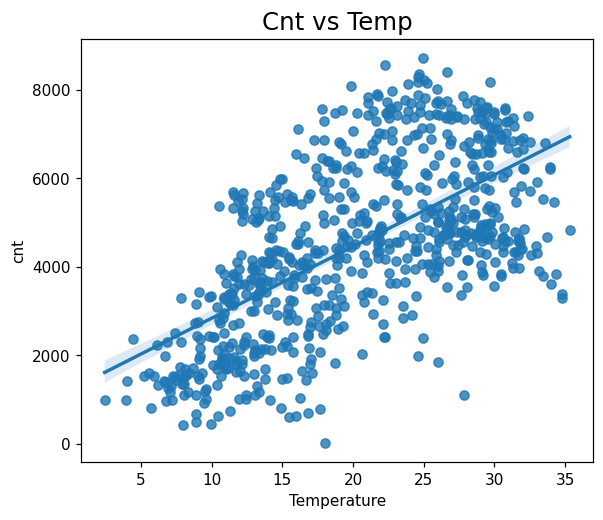

In [ ]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()


Inference:
Demand for bikes is positively correlated to temp.
We can see that cnt is linearly increasing with temp indicating linear relation.

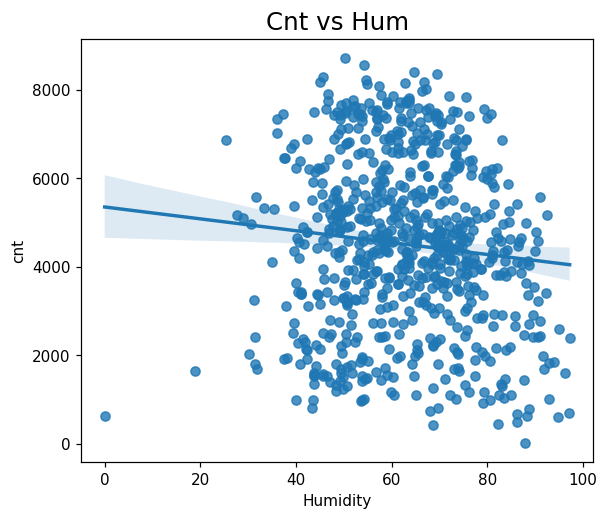

In [ ]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### _`Inference`_:
- Hum is values are more scattered around.
- Although we can see cnt decreasing with increase in humidity.

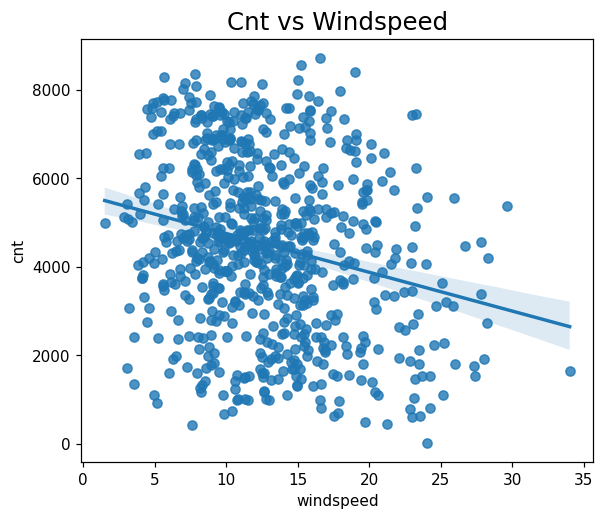

In [ ]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="windspeed")
plt.show()

#### _`Inference`_:
- Windspeed is values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

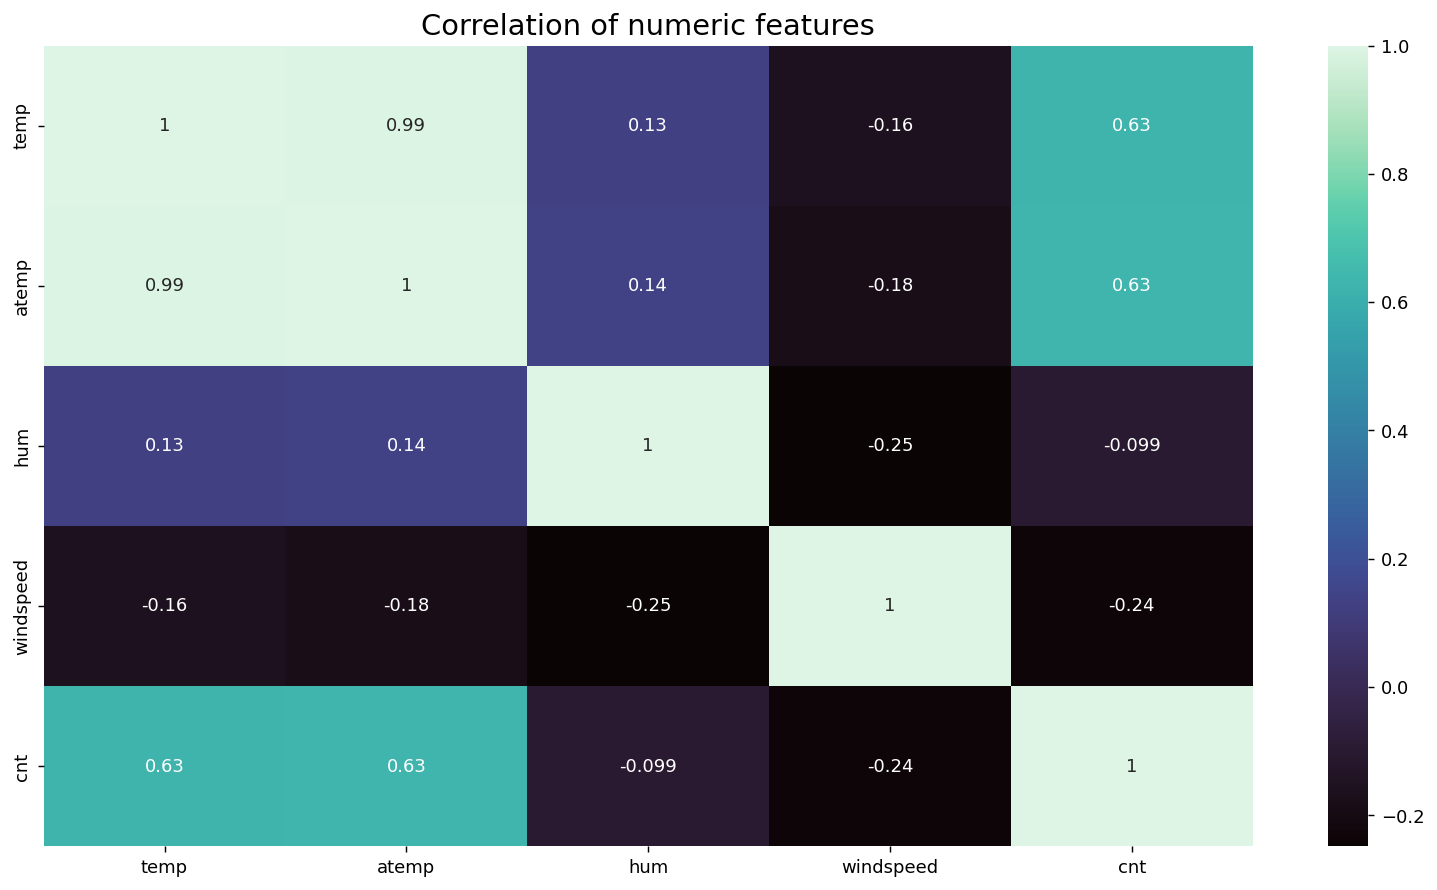

In [ ]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bikeSharing_df[num_features].corr(),annot= True,cmap="mako")
plt.show()

#### `_Inference`_:
- Temp and Atemp are highly correlated
- Temp and Atemp also have high correlation with cnt variable.

In [ ]:
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["season","mnth","weekday"],drop_first=True)
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["weathersit"])

In [ ]:
#Print columns after creating dummies
bikeSharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

#  Model Building

###  Split Data into training and test

In [ ]:
#y to contain only target variable
y=bikeSharing_df.pop('cnt')

#X is all remainign variable also our independent variables
X=bikeSharing_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


In [ ]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [40]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.896978,0,0,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,1,...,0,0,1,0,0,0,0,0,0,1


## Build a Model using RFE and Automated approach

#### Use RFE to eliminate some columns

In [41]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [46]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 3),
 ('season_spring', False, 5),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', False, 16),
 ('mnth_feb', False, 4),
 ('mnth_jan', False, 2),
 ('mnth_jul', False, 10),
 ('mnth_jun', False, 9),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 8),
 ('mnth_nov', False, 15),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 11),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 12),
 ('weekday_wed', False, 17),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [47]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [48]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [49]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_oct', 'mnth_sept',
       'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [50]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'days_old', 'season_spring', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'weekday_mon', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

### Model 1 - Start with all variables selected by RFE

In [51]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.50e-191
Time:                        17:52:36   Log-Likelihood:                -4114.8
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     495   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2206.7691    

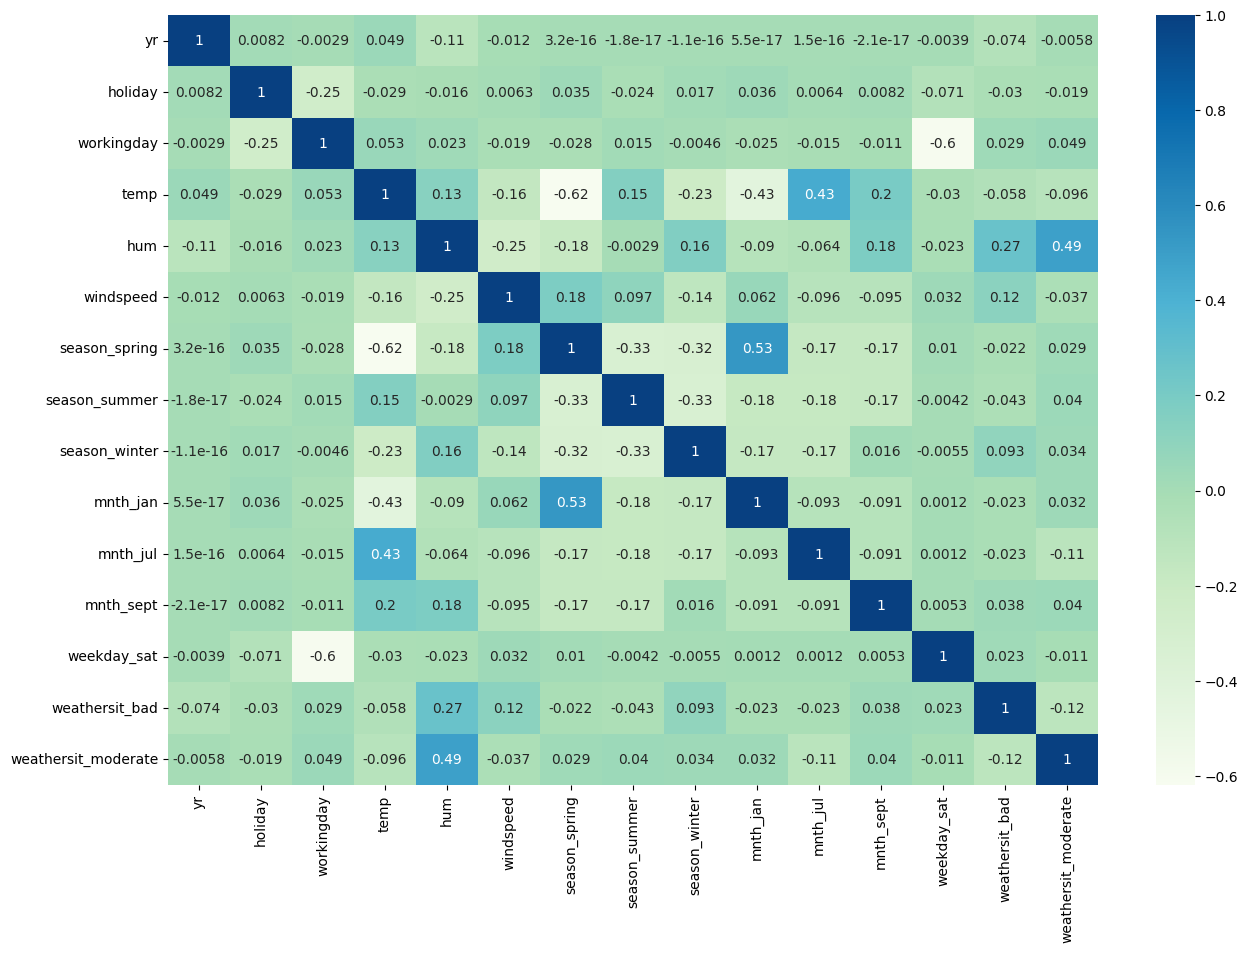

In [52]:
# Checking correlation of features selected by RFE with target column.
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikeSharing_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

## Model 2

In [53]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          7.31e-192
Time:                        17:53:35   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8264.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2105.3594    

## Model 3

#### All the columns have p-value > .05 so checking VIFs

In [54]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.84e-189
Time:                        17:54:50   Log-Likelihood:                -4126.3
No. Observations:                 511   AIC:                             8281.
Df Residuals:                     497   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1382.9821    

## Module 4

In [55]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.69e-189
Time:                        17:55:19   Log-Likelihood:                -4128.5
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     498   BIC:                             8338.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1310.5086    

## Model 5

In [56]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          5.44e-189
Time:                        17:55:43   Log-Likelihood:                -4132.1
No. Observations:                 511   AIC:                             8288.
Df Residuals:                     499   BIC:                             8339.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1234.8118    

## Model 6

In [57]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     165.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.23e-151
Time:                        17:56:04   Log-Likelihood:                -4223.8
No. Observations:                 511   AIC:                             8470.
Df Residuals:                     500   BIC:                             8516.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4623.1969    

## Model 7

In [58]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     80.87
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           8.51e-98
Time:                        17:56:28   Log-Likelihood:                -4350.8
No. Observations:                 511   AIC:                             8724.
Df Residuals:                     500   BIC:                             8770.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3172.1145    

## Model 8

In [59]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     80.87
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           8.51e-98
Time:                        17:57:02   Log-Likelihood:                -4350.8
No. Observations:                 511   AIC:                             8724.
Df Residuals:                     500   BIC:                             8770.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3172.1145    

## Model 9

In [60]:
# Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.87e-144
Time:                        17:57:23   Log-Likelihood:                -4240.2
No. Observations:                 511   AIC:                             8502.
Df Residuals:                     500   BIC:                             8549.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4242.3703    

## Model 10

In [61]:
# using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     148.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.64e-143
Time:                        17:57:45   Log-Likelihood:                -4244.2
No. Observations:                 511   AIC:                             8510.
Df Residuals:                     500   BIC:                             8557.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4638.5725    

## Model 11

In [62]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.37e-181
Time:                        17:58:12   Log-Likelihood:                -4155.8
No. Observations:                 511   AIC:                             8332.
Df Residuals:                     501   BIC:                             8374.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1756.1098    

#### `_Inference`_
Here VIF seems to be almost accepted. p-value for all the features is  almost 0.0 and R2 is 0.821
Let us select Model 11 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables.
Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [63]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [64]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1756.1098393624848 [ 2034.16315619  -994.43098011  -573.6791134    466.54298163
   521.31907669  -389.61511052 -2611.34937558  -682.72838966
  4084.54166896]


##  Model Evaluation
### Residucal Analysis

In [65]:
y_train_pred = lr.predict(X_train[cols])

In [66]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

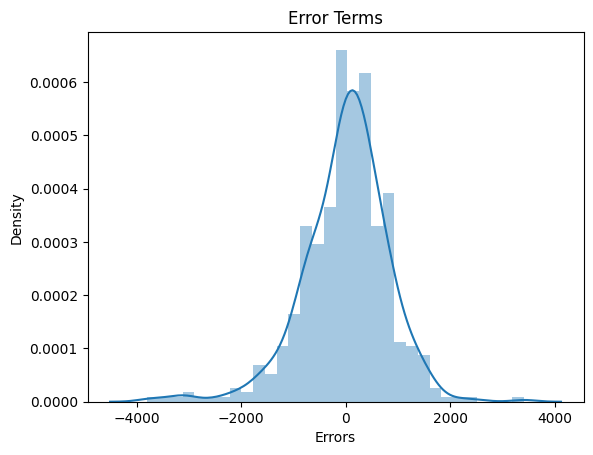

In [67]:
plot_res_dist(y_train, y_train_pred)

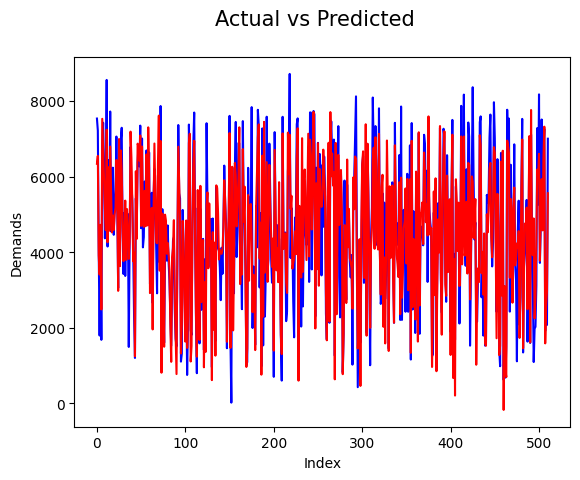

In [68]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

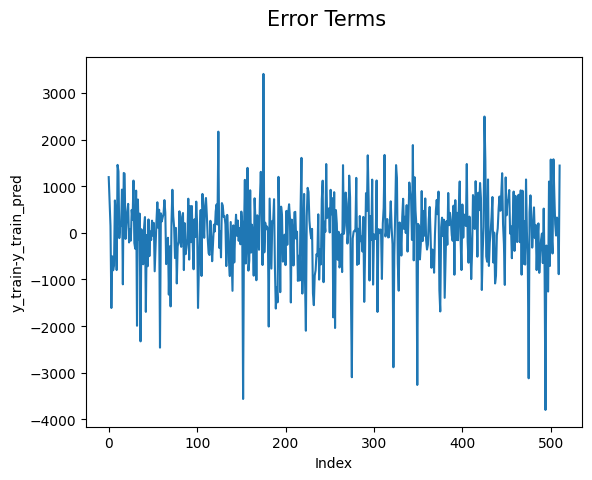

In [69]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [70]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8218407272695407

Linearity Check

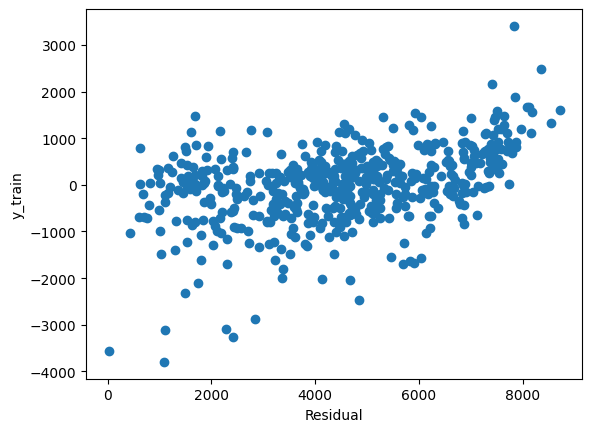

In [71]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

###  Predict values for test data set

In [72]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [73]:
#Columns from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [74]:
# Find out the R squared value between test and predicted test data sets.
r2_score(y_test,y_test_pred)

0.8112207415085254

##### _`Inference`_
R2 value for predictions on test data (0.815) is almost same as R2 value of train data(0.818). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

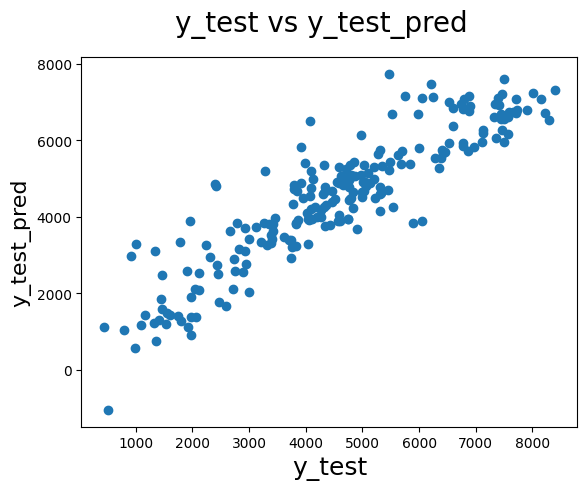

In [75]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

### Plot Test vs Predicted test values

In [76]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

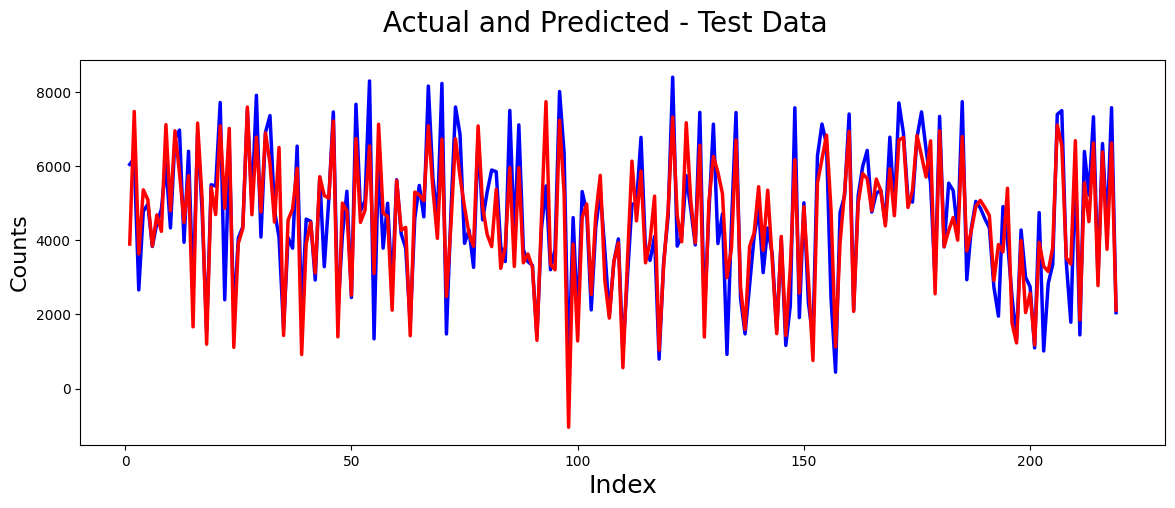

In [77]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

In [78]:
  #Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.37e-181
Time:                        18:02:28   Log-Likelihood:                -4155.8
No. Observations:                 511   AIC:                             8332.
Df Residuals:                     501   BIC:                             8374.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1756.1098    

### Interepretation of results

### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

#### Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

### _`Conclusion`_
Significant variables to predict the demand for shared bikes
- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)